In [60]:
import pandas as pd
import numpy as np
import sys

#ajuste columnas
pd.set_option('display.max_columns',None)

sys.path.append("..")
from src import sp_categorias_nulos as sp
from src import sp_visualizacion as sp_vi

#Paqutes de visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
df_limpio=pd.read_csv(r'C:\Users\matis\Desktop\EDA_MK_POWER\data\eda_limpieza_files\bankadditional_geocoded.csv')

In [62]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         43170 non-null  int64  
 1   Age                37880 non-null  float64
 2   Job                42655 non-null  object 
 3   Marital            42915 non-null  object 
 4   Education          41193 non-null  object 
 5   Default            34019 non-null  object 
 6   Housing            41974 non-null  object 
 7   Loan               41974 non-null  object 
 8   Contact            43000 non-null  object 
 9   Duration           43000 non-null  float64
 10  Campaign           43000 non-null  float64
 11  Previous           43000 non-null  float64
 12  Poutcome           43000 non-null  object 
 13  Emp.var.rate       43000 non-null  float64
 14  Cons.price.idx     42529 non-null  float64
 15  Cons.conf.idx      43000 non-null  float64
 16  Euribor3m          337

In [63]:
df_limpio.drop(columns='Unnamed: 0', axis=1, inplace=True)

Empezmos a trabajar: Observación general de nulos

In [64]:
sp.calcular_nulos(df_limpio)

Age                  12.253880
Job                   1.192958
Marital               0.590688
Education             4.579569
Default              21.197591
Housing               2.770442
Loan                  2.770442
Contact               0.393792
Duration              0.393792
Campaign              0.393792
Previous              0.393792
Poutcome              0.393792
Emp.var.rate          0.393792
Cons.price.idx        1.484827
Cons.conf.idx         0.393792
Euribor3m            21.834607
Nr.employed           0.393792
Subscribed            0.393792
Date                  0.968265
Latitude              0.393792
Longitude             0.393792
ID                    0.000000
Income                0.000000
Kidhome               0.000000
Teenhome              0.000000
Dt_Customer           0.000000
NumWebVisitsMonth     0.000000
City                  0.393792
Country               0.393792
Region                1.035441
dtype: float64

Analisis y gestion de nulos de las categoricas

In [65]:
#seleccionamos las categoricas
df_limpio.select_dtypes(include='O').columns


Index(['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact',
       'Poutcome', 'Subscribed', 'Date', 'ID', 'Dt_Customer', 'City',
       'Country', 'Region'],
      dtype='object')

In [66]:
df_limpio['Job'].unique()

array(['services', 'technician', 'blue_collar', 'entrepreneur', 'admin.',
       'housemaid', 'management', 'student', 'retired', 'unemployed',
       'self_employed', nan], dtype=object)

In [67]:
#Empezamos con job
df_limpio['Job'].value_counts(normalize=True)

Job
admin.           0.254906
blue_collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self_employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

In [68]:
sp.calcular_nulos_columna(df_limpio,'Job')

np.float64(1.19)

In [69]:
sp.analisis_general_categoricas(df_limpio)

Job tiene 12 valores únicos
Valores unicos:['services' 'technician' 'blue_collar' 'entrepreneur' 'admin.' 'housemaid'
 'management' 'student' 'retired' 'unemployed' 'self_employed' nan]
Nulos:1.19%


Job
admin.           0.254906
blue_collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self_employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

-----------------------------------------
Marital tiene 4 valores únicos
Valores unicos:['single' 'divorced' 'married' nan]
Nulos:0.59%


Marital
married     0.605825
single      0.282069
divorced    0.112105
Name: proportion, dtype: float64

-----------------------------------------
Education tiene 8 valores únicos
Valores unicos:['high_school' 'professional_course' 'basic_9y' 'university_degree'
 'basic_6y' 'basic_4y' nan 'illiterate']
Nulos:4.58%


Education
university_degree      0.308839
high_school            0.240939
basic_9y               0.153157
professional_course    0.132959
basic_4y               0.105746
basic_6y               0.057922
illiterate             0.000437
Name: proportion, dtype: float64

-----------------------------------------
Default tiene 3 valores únicos
Valores unicos:['no' nan 'yes']
Nulos:21.2%


Default
no     0.999912
yes    0.000088
Name: proportion, dtype: float64

-----------------------------------------
Housing tiene 3 valores únicos
Valores unicos:['yes' 'no' nan]
Nulos:2.77%


Housing
yes    0.535998
no     0.464002
Name: proportion, dtype: float64

-----------------------------------------
Loan tiene 3 valores únicos
Valores unicos:['no' 'yes' nan]
Nulos:2.77%


Loan
no     0.84438
yes    0.15562
Name: proportion, dtype: float64

-----------------------------------------
Contact tiene 3 valores únicos
Valores unicos:['telephone' 'cellular' nan]
Nulos:0.39%


Contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

-----------------------------------------
Poutcome tiene 4 valores únicos
Valores unicos:['nonexistent' 'success' 'failure' nan]
Nulos:0.39%


Poutcome
nonexistent    0.862860
failure        0.103744
success        0.033395
Name: proportion, dtype: float64

-----------------------------------------
Subscribed tiene 3 valores únicos
Valores unicos:['no' 'yes' nan]
Nulos:0.39%


Subscribed
no     0.887349
yes    0.112651
Name: proportion, dtype: float64

-----------------------------------------
Date tiene 1826 valores únicos
Valores unicos:['2018-01-23' '2018-02-12' '2015-01-13' ... '2019-12-14' '2015-12-30'
 '2017-09-21']
Nulos:0.97%


Date
2018-02-28    0.002222
2016-02-28    0.002199
2015-02-28    0.002152
2017-02-28    0.002082
2019-02-28    0.001988
                ...   
2015-05-04    0.000257
2015-11-20    0.000234
2017-04-04    0.000234
2015-04-14    0.000234
2019-12-21    0.000234
Name: proportion, Length: 1825, dtype: float64

-----------------------------------------
ID tiene 43170 valores únicos
Valores unicos:['0000e811-006e-4404-b535-89bf6cd96553'
 '0000ea53-e9b2-4b3f-9f4b-058f37e5fab8'
 '000165f9-20c0-4cb5-bd47-6233b92655c1' ...
 'fffd1227-80ee-4feb-98e0-3e4c7f8c30fd'
 'fffe3fc3-ee08-41f1-82e0-872d9d90f51a'
 'fffe84df-4e63-4465-82de-0d9821d919bf']
Nulos:0.0%


ID
fffe84df-4e63-4465-82de-0d9821d919bf    0.000023
0000e811-006e-4404-b535-89bf6cd96553    0.000023
ffdbe65e-3249-456c-a8f9-544935b40fdd    0.000023
ffdbe151-4f82-4c19-b63c-841c91fc3084    0.000023
ffda2b4b-0b68-493e-ac68-f81614c57f5d    0.000023
                                          ...   
0006c8fd-9dea-439d-a3b9-571b3901ff58    0.000023
000625bd-cc08-4653-b8b7-1853c458527d    0.000023
0004e1d1-958d-4abf-a57c-9b9c7be887a0    0.000023
00024507-c59b-4eee-86d5-cc341b96eb6d    0.000023
000165f9-20c0-4cb5-bd47-6233b92655c1    0.000023
Name: proportion, Length: 43170, dtype: float64

-----------------------------------------
Dt_Customer tiene 1096 valores únicos
Valores unicos:['2014-07-17' '2014-01-04' '2014-12-01' ... '2013-09-30' '2013-03-26'
 '2013-07-28']
Nulos:0.0%


Dt_Customer
2012-01-11    0.001830
2012-08-10    0.001830
2012-12-28    0.001737
2012-11-25    0.001668
2012-12-21    0.001668
                ...   
2013-09-09    0.000347
2013-02-12    0.000347
2013-06-05    0.000347
2013-10-18    0.000301
2013-10-24    0.000278
Name: proportion, Length: 1096, dtype: float64

-----------------------------------------
City tiene 6582 valores únicos
Valores unicos:[nan 'Blanding' 'Grand Isle' ... 'New Freedom' 'Pardeeville' 'Deerfield']
Nulos:0.39%


City
Hamilton          0.021791
Buxton            0.018093
Cockburn Town     0.017395
Bahia Asuncion    0.016884
Lompoc            0.015256
                    ...   
Fairland          0.000023
Lawrence          0.000023
Hallstead         0.000023
Lake Mohegan      0.000023
Carencro          0.000023
Name: proportion, Length: 6581, dtype: float64

-----------------------------------------
Country tiene 8 valores únicos
Valores unicos:[nan 'US' 'TC' 'MX' 'BS' 'CA' 'BM' 'CU']
Nulos:0.39%


Country
US    0.749698
MX    0.111233
CA    0.073186
BS    0.036093
BM    0.021140
TC    0.006442
CU    0.002209
Name: proportion, dtype: float64

-----------------------------------------
Region tiene 88 valores únicos
Valores unicos:[nan 'Utah' 'Louisiana' 'Massachusetts' 'Minnesota' 'Montana' 'New Jersey'
 'Michigan' 'Arkansas' 'Oregon' 'California' 'Baja California Sur'
 'New York' 'San Salvador' 'Texas' 'Quebec' 'Tennessee' 'Wisconsin'
 'Chihuahua' 'Ontario' 'Idaho' 'Arizona' 'Maine' 'Hamilton city' 'Florida'
 'Tamaulipas' 'North Abaco' 'Virginia' 'British Columbia'
 'Baja California' 'Washington' 'North Carolina' 'Sonora' 'New Mexico'
 'Illinois' 'Oklahoma' 'Mississippi' 'Wyoming' 'Nuevo Leon' 'Nebraska'
 'Iowa' 'West Grand Bahama' 'South Dakota' 'Sinaloa' 'Kentucky'
 'Pennsylvania' 'North Dakota' 'Missouri' 'Colorado' 'Coahuila'
 'New Hampshire' 'Indiana' 'Nevada' 'Durango' 'Kansas' 'Georgia' 'Ohio'
 'Central Abaco' 'East Grand Bahama' 'Pinar del Rio' 'Central Eleuthera'
 'Nova Scotia' 'South Carolina' 'Alabama' 'Maryland' 'Vermont' 'Yucatan'
 'New Brunswick' 'Delaware' 'Alberta' "Moore's Island" 'Manitoba'
 'Rhode Island'

Region
California        0.069143
Texas             0.059897
North Carolina    0.040845
Ontario           0.035391
Montana           0.034712
                    ...   
Harbour Island    0.000421
Freeport          0.000351
Spanish Wells     0.000351
Black Point       0.000164
Artemisa          0.000094
Name: proportion, Length: 87, dtype: float64

-----------------------------------------


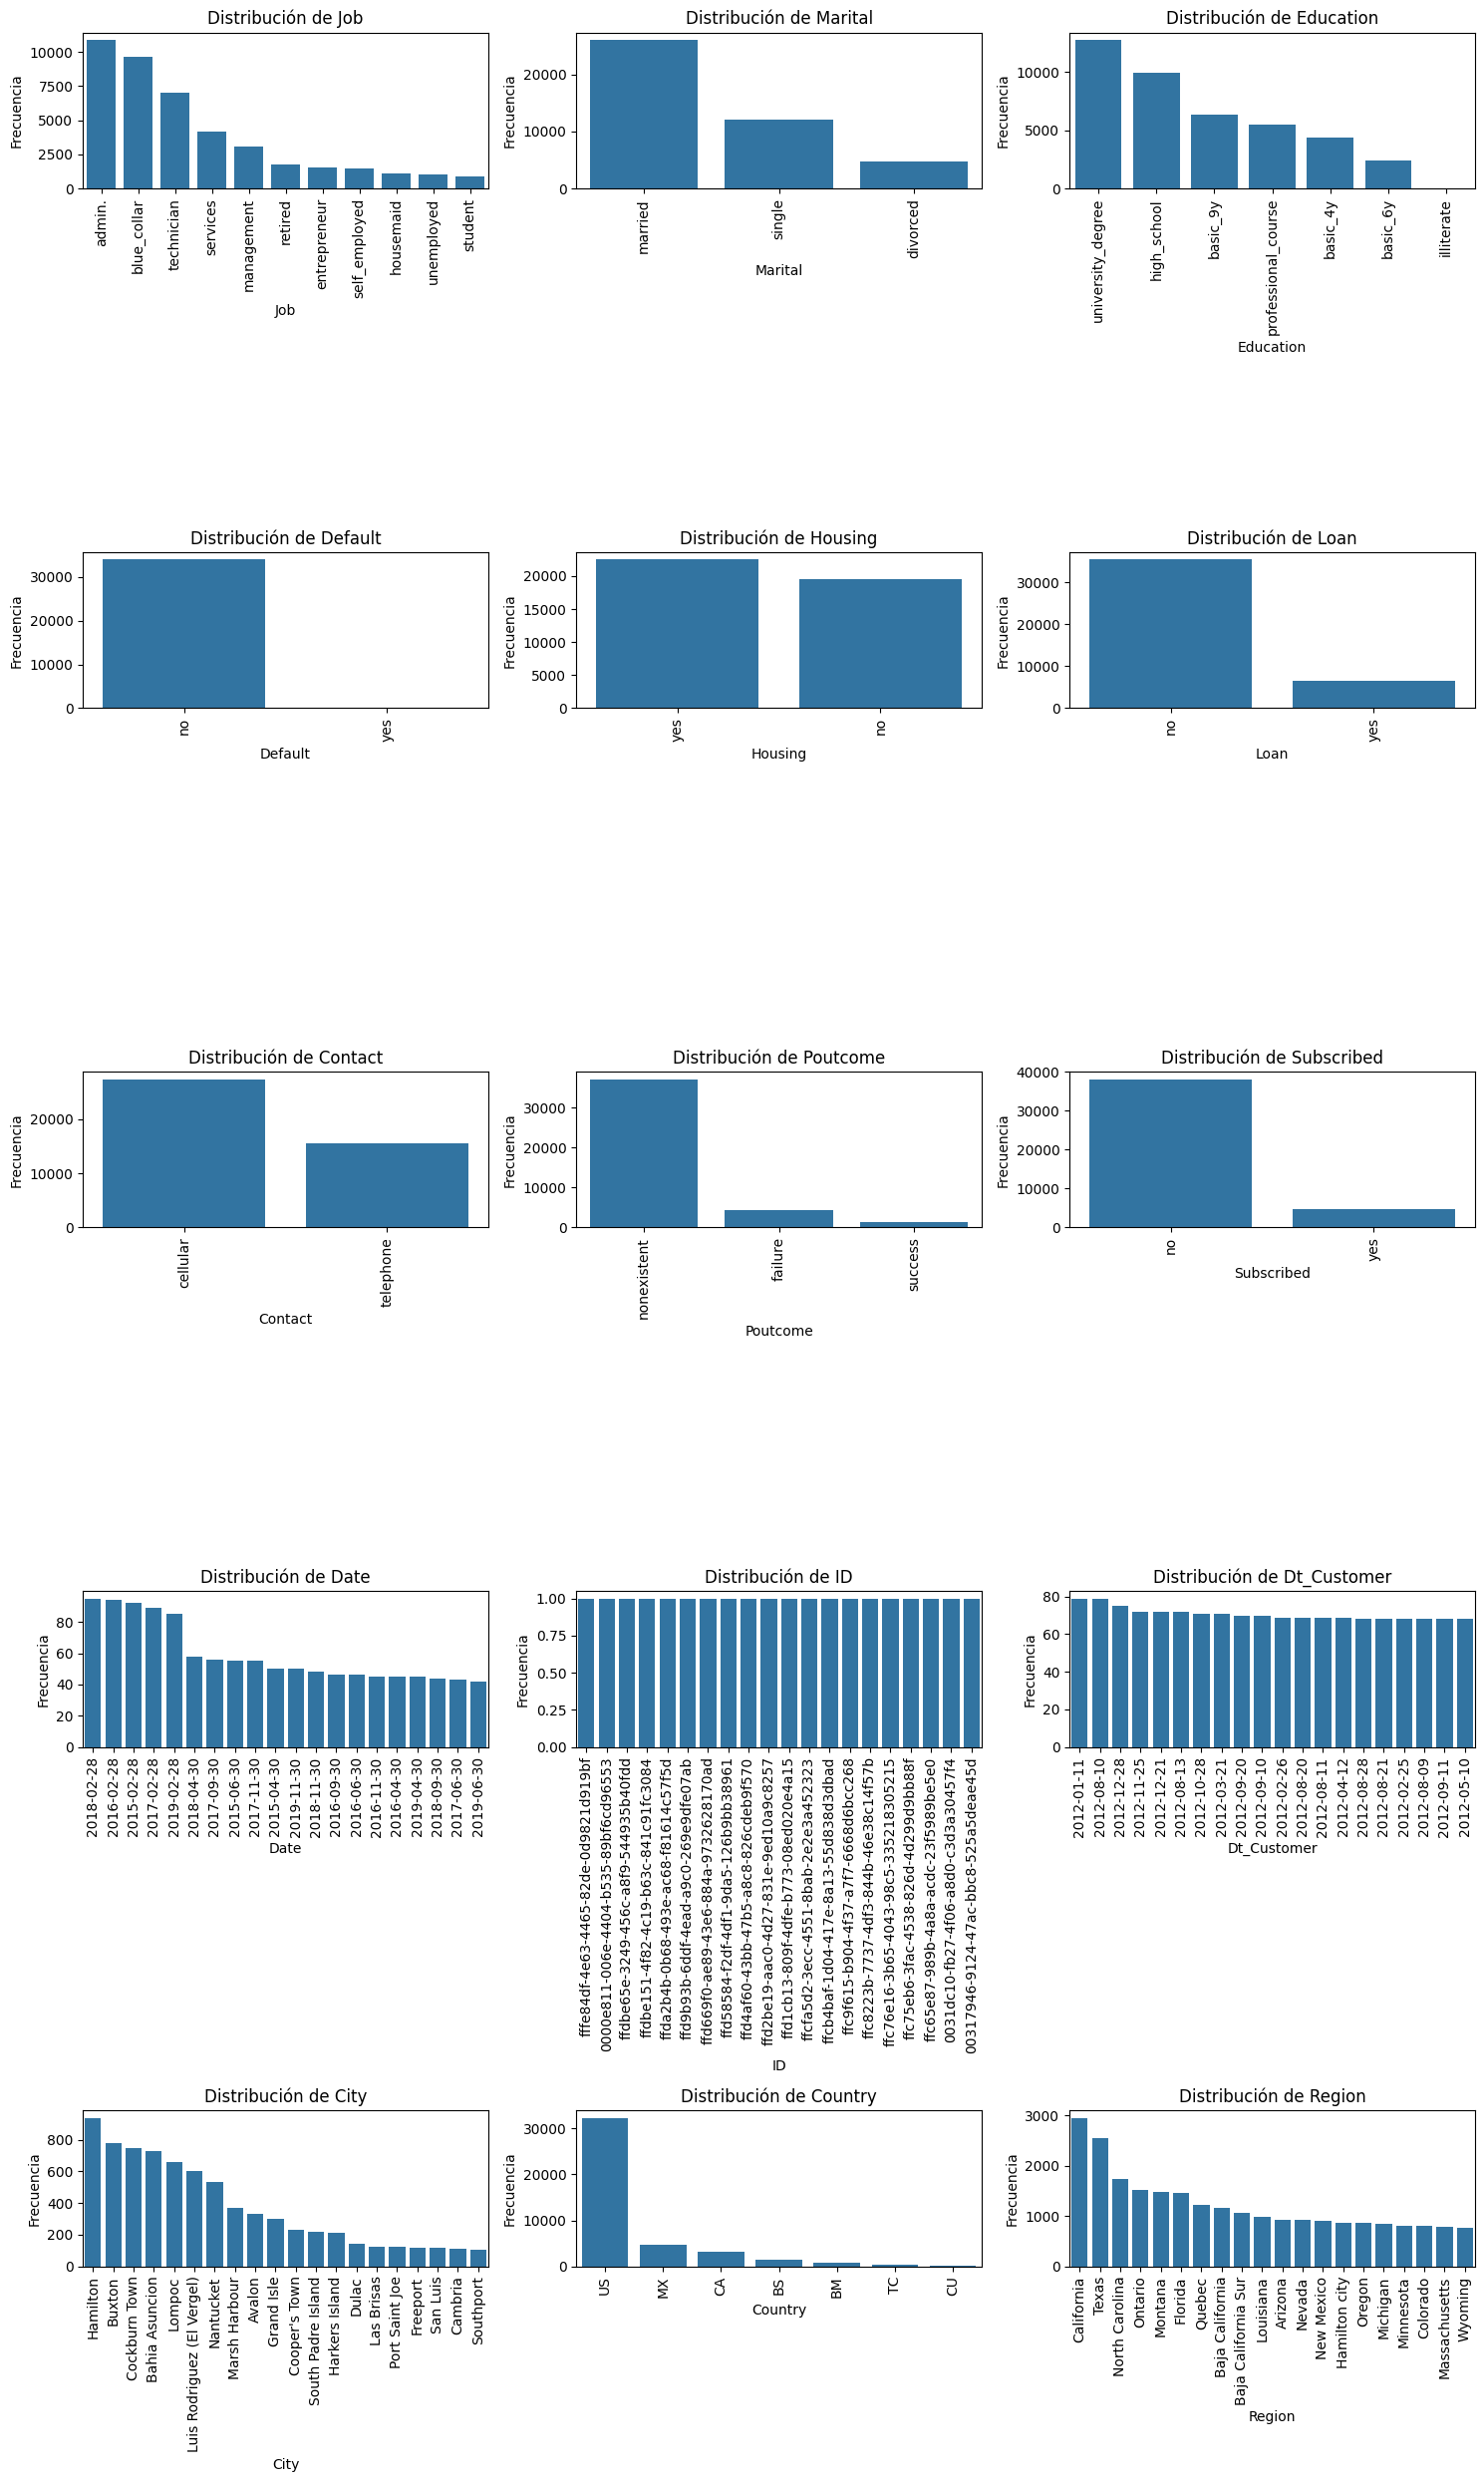

<Figure size 640x480 with 0 Axes>

In [70]:
sp_vi.visualizar_col_categoricas(df_limpio)

Se traducen los cógigos de los países ya que pueden generar confusión

In [71]:
df_limpio['Country']=df_limpio['Country'].map({"US":"united_states","TC":"turks_and_caicos_islands","MX":"mexico","BS":"bahamas","CA":"canada","BM":"bermuda","CU":"cuba"})

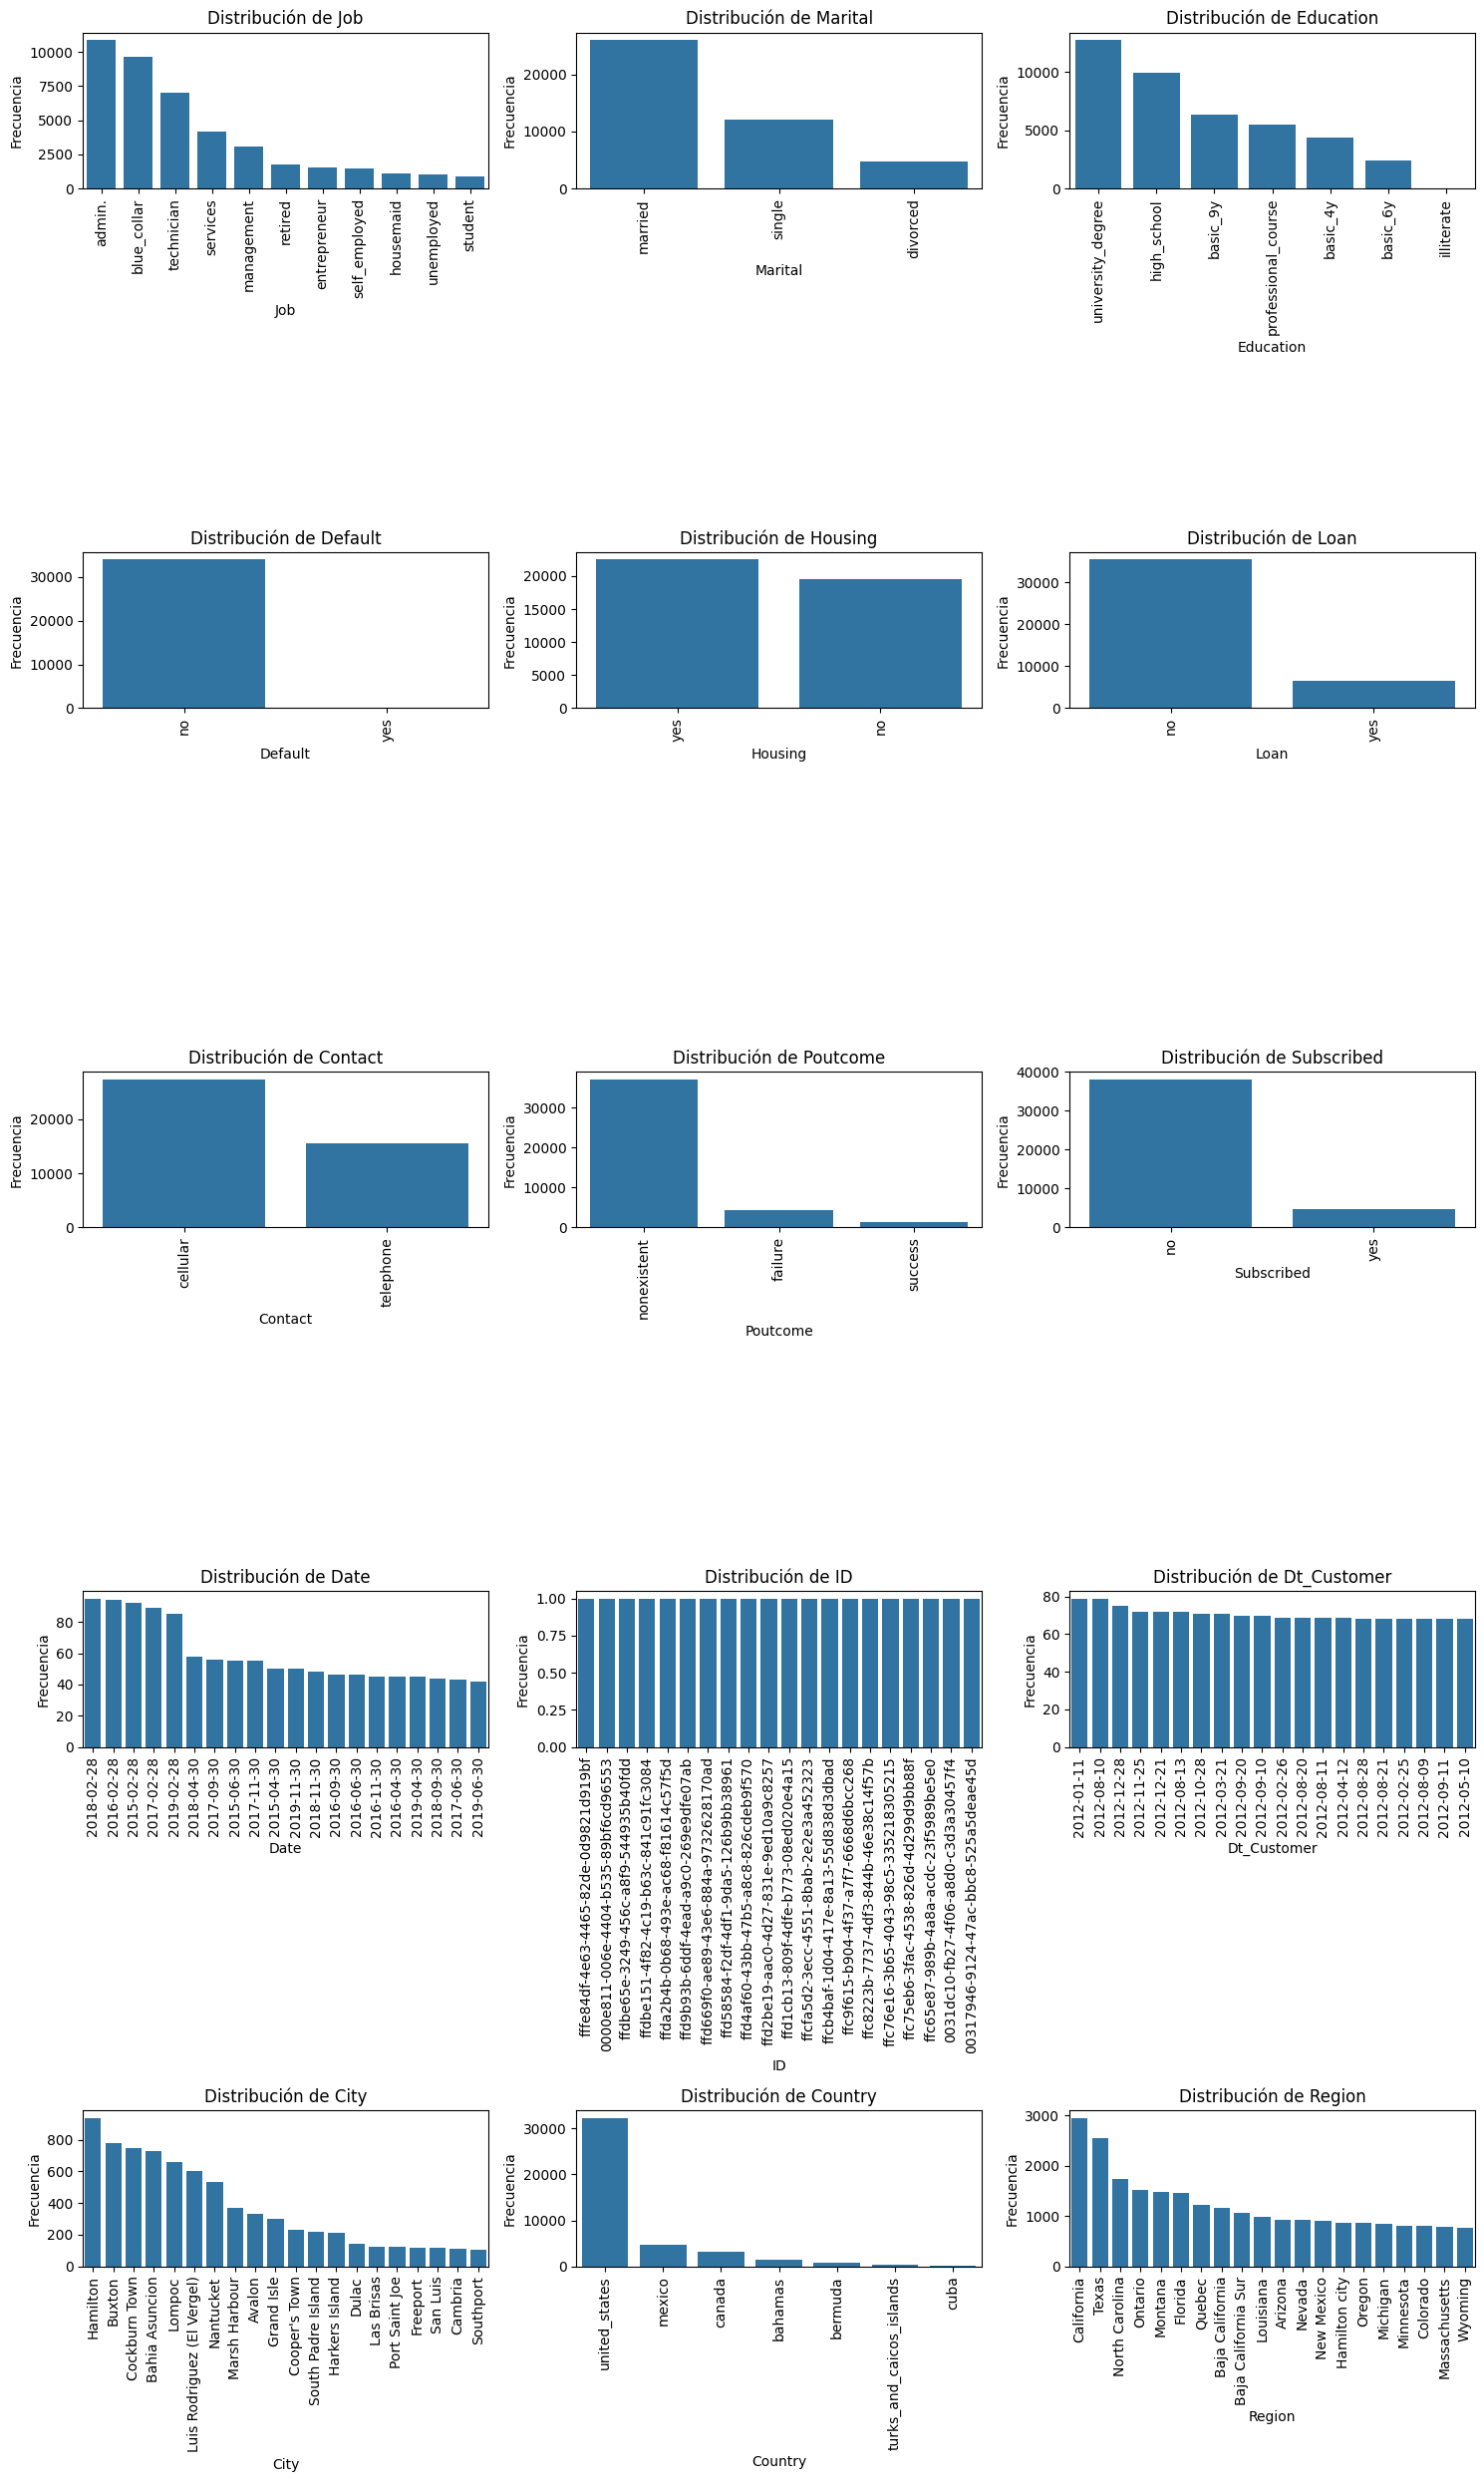

<Figure size 640x480 with 0 Axes>

In [72]:
sp_vi.visualizar_col_categoricas(df_limpio)

In [73]:
#se crea un dataframe para hacer el estudio de los valores categóricos
df_object=df_limpio[df_limpio.select_dtypes(include='O').columns]

In [74]:
#se buscan los nulos de estos valores
sp.calcular_nulos(df_object)

Job             1.192958
Marital         0.590688
Education       4.579569
Default        21.197591
Housing         2.770442
Loan            2.770442
Contact         0.393792
Poutcome        0.393792
Subscribed      0.393792
Date            0.968265
ID              0.000000
Dt_Customer     0.000000
City            0.393792
Country         0.393792
Region          1.035441
dtype: float64

La única columna que tiene más de un 50% de valores nulos es dt_customer, pero al ser un volumend e datos muy grande puede seguir siendo relevante por lo tanto no se borra la columna
La estrategia que se va a seguir es rellenar los valores nulos
- Relleno con moda: La columna default tiene un porcentaje de no muy alto mayor al 99% y hay 20% de nulos
- Relleno con unknown: REsto de columnas

In [75]:
#se rellenan los nulos
sp.rellenar_nulos(df_limpio)


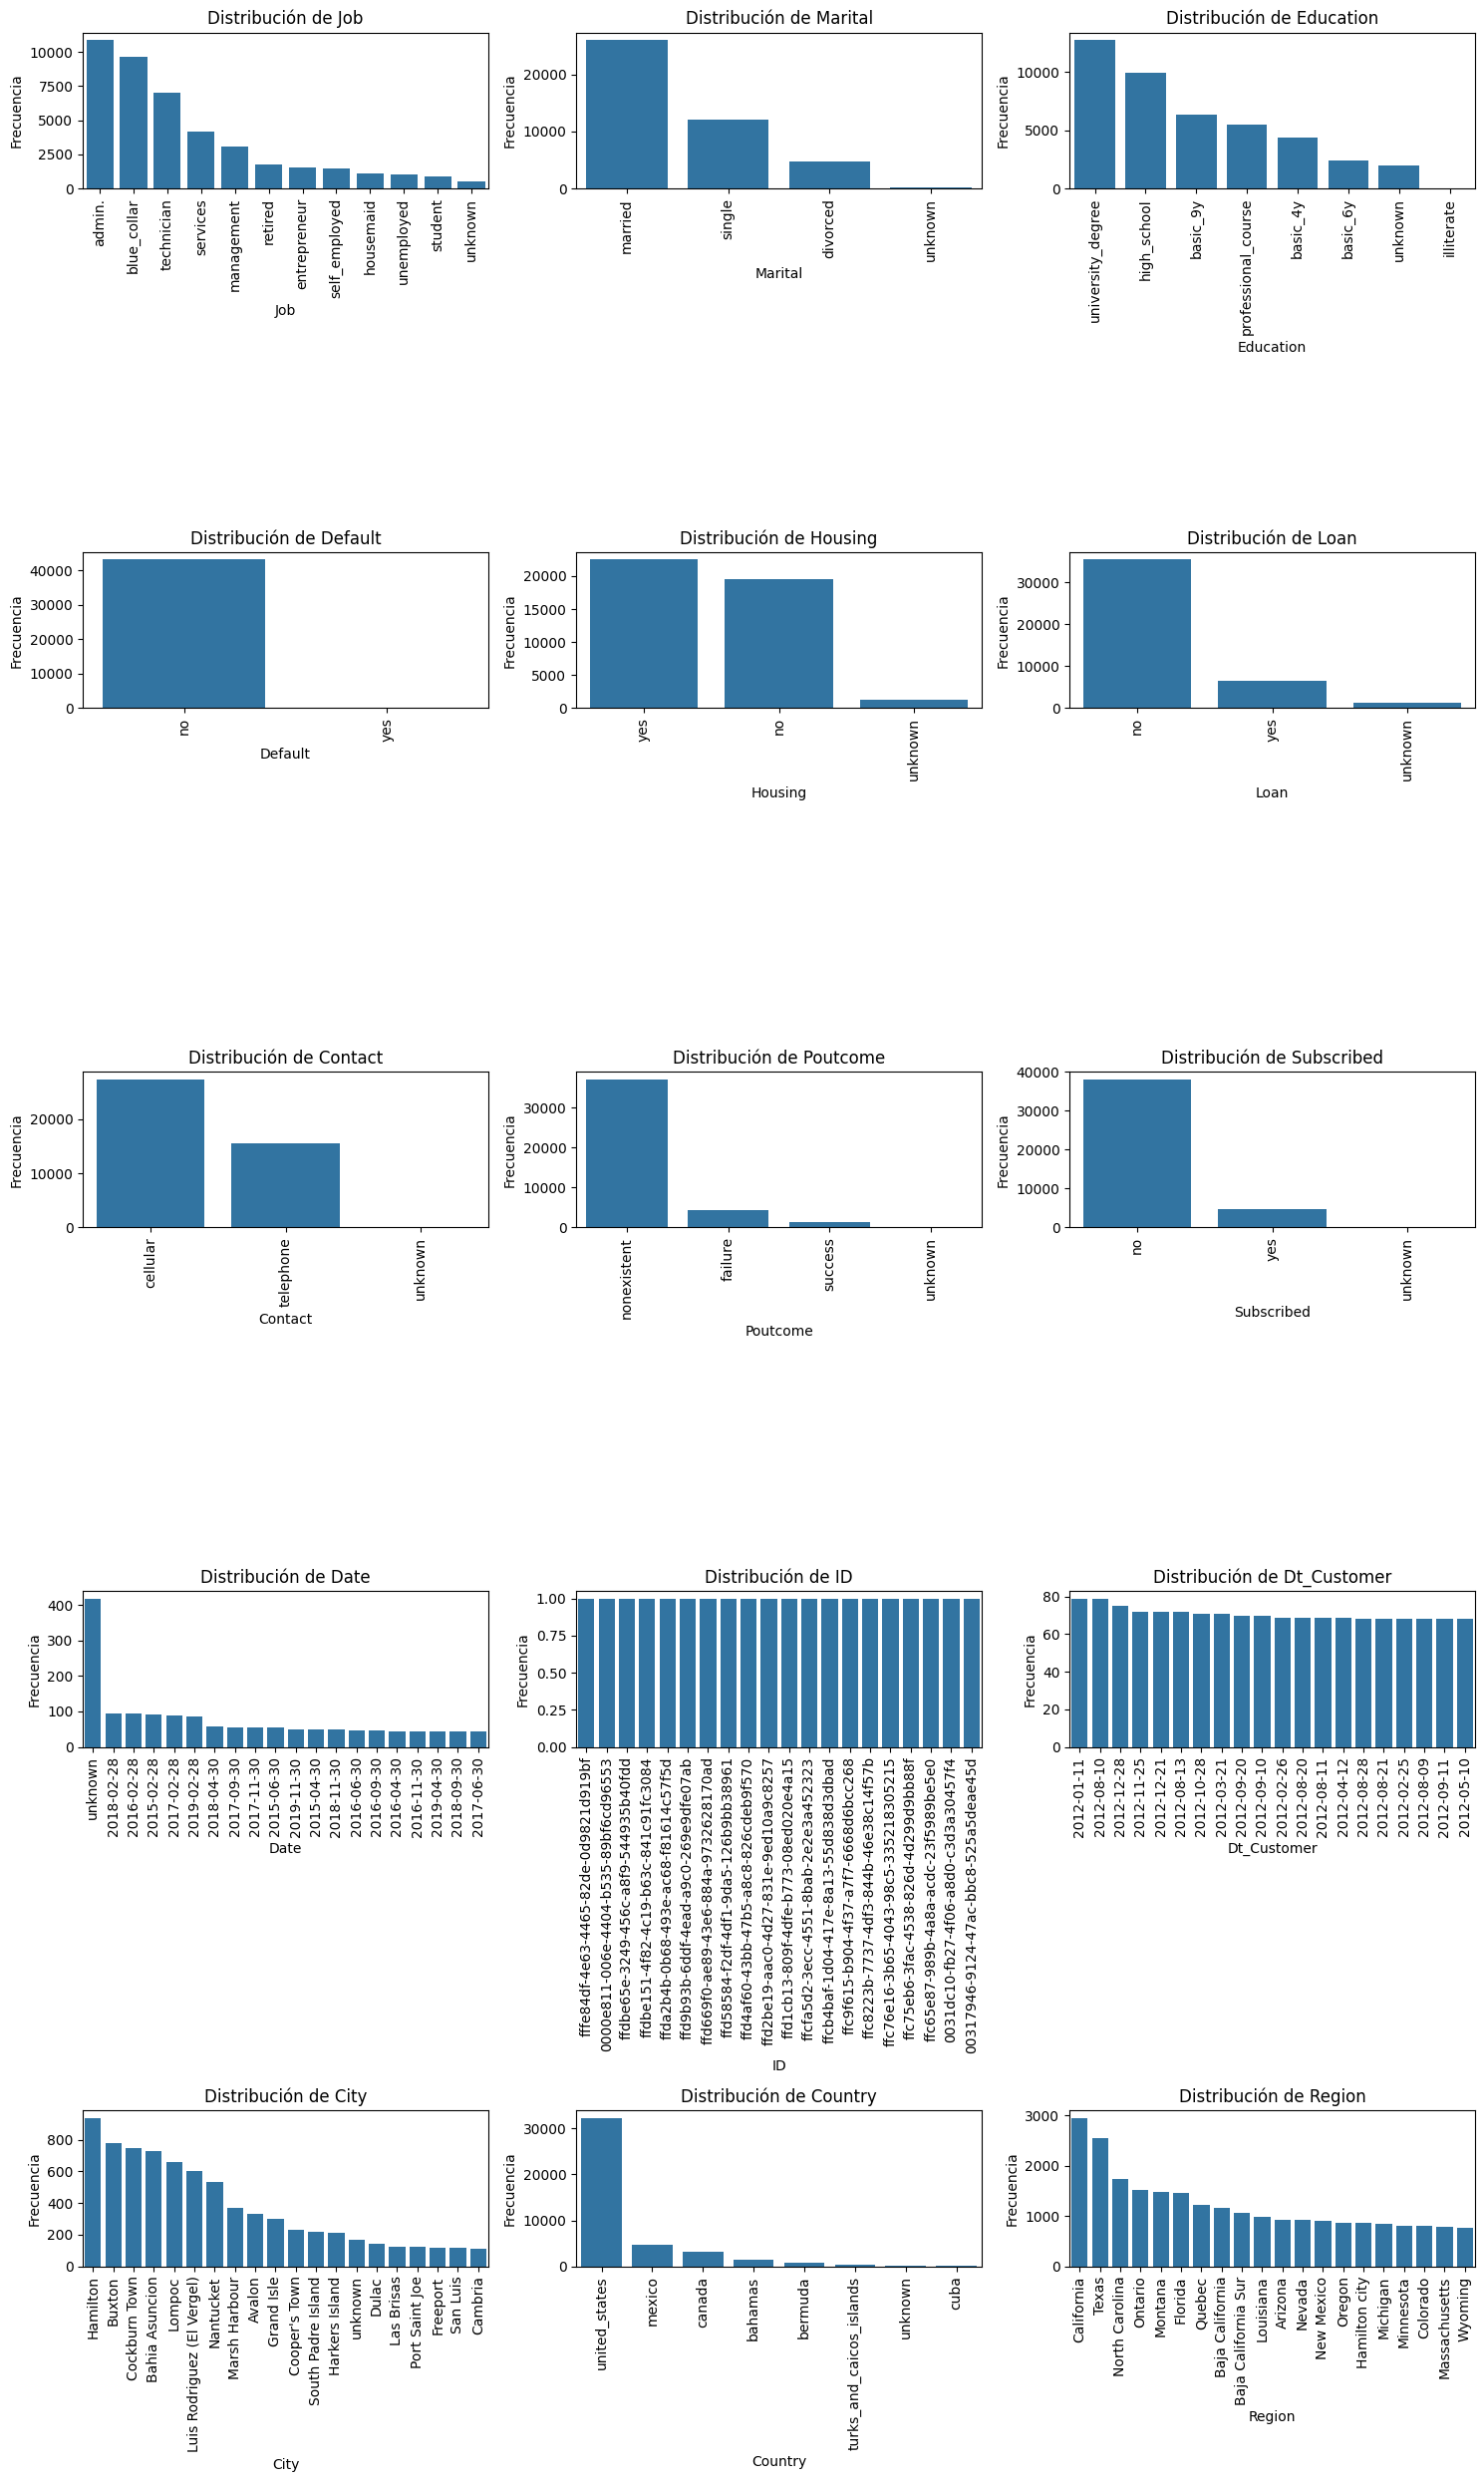

<Figure size 640x480 with 0 Axes>

In [76]:
sp_vi.visualizar_col_categoricas(df_limpio)

In [77]:
df_limpio.to_csv('df_gestion_nulos_ok.csv')